In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
chi4_inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+0j_dwQsrc_bounds.npy")
chi4_inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+0j_dwQsrc.npy")
chi4p1em1_inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_Qsrc_bounds.npy")
chi4p1em1_inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_Qsrc.npy")
chi4p1j_inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1j_Qsrc_bounds.npy")
chi4p1j_inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1j_Qsrc.npy")

In [3]:
def L(w, w0, dw):
    return (dw/np.pi)/((w-w0)**2 + dw**2)

def W(w, w0, dw):
    return (L(w, w0, dw) - L(-w, w0, dw))/w*(dw**2 + w0**2)/w0

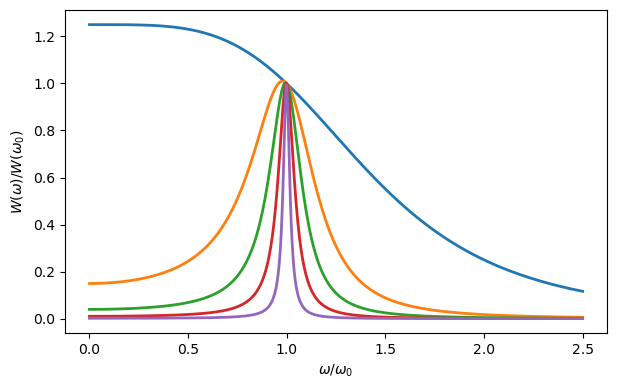

In [4]:
plt.figure(figsize=(7,4.2))
# plt.figure(figsize=(3.5,3))
wlist = np.linspace(1e-2, 2.5*2*np.pi, 600)
Qlist = [1,8,16,24,32]
Qlist = [1,2,3,4,5]
Qlist = [0.5,2.5,5,10,25]
for i in range(len(Qlist)):
    plt.plot(wlist/(2*np.pi), [W(w, 2*np.pi, np.pi/(Qlist[i]))/W(2*np.pi, 2*np.pi, np.pi/(Qlist[i])) for w in wlist], linewidth=2)

# plt.rc('font', size=18)
plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$W(\omega)/W(\omega_{0})$')
plt.savefig('windowfunctionexamples.pdf',bbox_inches='tight')

In [5]:
def fslope(slope, chi1, chi0, bound0):
    return bound0*np.exp(slope*(np.log(chi1)-np.log(chi0)))

In [6]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

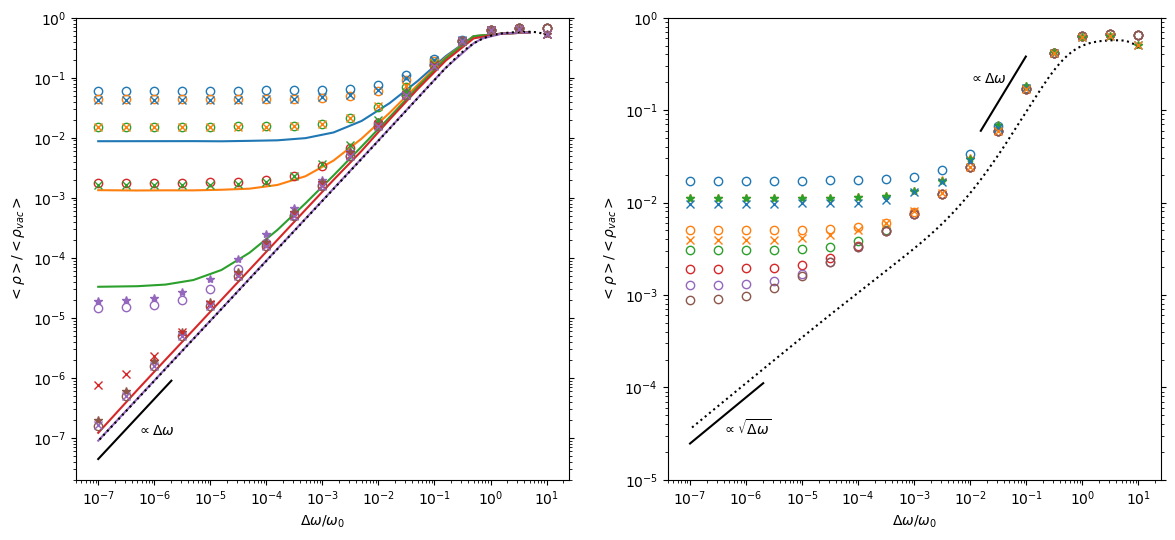

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

L_list = [1.0, 1.26, 1.59, 3.0, 5.0]
styles = ['solid', 'solid', 'solid', 'solid', 'solid']

#plot inf-space bounds
#plot \delta\omega/\omega_{0} (rather than Q) versus the bounds
ax1.plot(np.reciprocal(2*chi4_inf_Qsrc_list), chi4_inf_bounds_list, label='$L/\lambda_{0} = \infty$', linestyle='dotted', color='black')

bounds_files = ['DATA_PRL/TMLDOS_fullspace_1by1_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOS_fullspace_1by1_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_Qsrc.txt']
colors = []
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, zorder=0)
    colors += [ax1.get_lines()[-1].get_c()]

#next plot inverse designs (so they appear on top of curves)

#Plot inverse designs
#plot circular sym designs to match arbitrary designs for same L values
design_enh_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc.txt']

L_vals = [1, 1.26, 1.59, 3, 5, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    if i < len(colors):
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', label='$L/\lambda_{0} = $' + str(L_vals[i]), color=colors[i], fillstyle='none', zorder=0)
    else:
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', label='$L/\lambda_{0} = $' + str(L_vals[i]), fillstyle='none', zorder=0)
        colors += [ax1.get_lines()[-1].get_c()]

#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[4], colors[5]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    

#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)

    
#add slopes
end_ind = len(chi4_inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = chi4_inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, chi4_inf_Qsrc_list[end_ind-ind_width//2], 0.5*chi4_inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*chi4_inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(chi4_inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

######################################################################

inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black')

# #plot slopes
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot slopes
shift = 60
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 3.8*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 3.8*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(-10,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#Plot inverse designs
#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc.txt']
L_vals = [1, 5, 10, 20, 40, 80]
colors = []
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax2.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', label='$R/\lambda_{0} = $' + str(L_vals[i]), zorder=0, fillstyle='none')
    colors += [plt.gca().lines[-1].get_color()]
    
#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[1], colors[2]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    
#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)
    
### label
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([2*1e-8, 1])
ax2.set_ylim([1e-5, 1])
# ax1.set_xlim([1e-5/5, 50])
# ax2.set_xlim([1e-7/5, 50])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
# ax1.legend()
# ax2.legend()
plt.savefig('chi4and4+1e-1jfiniteandinfSMALL.pdf', bbox_inches='tight')
plt.savefig('chi4and4+1e-1jfiniteandinfSMALL.png', bbox_inches='tight')

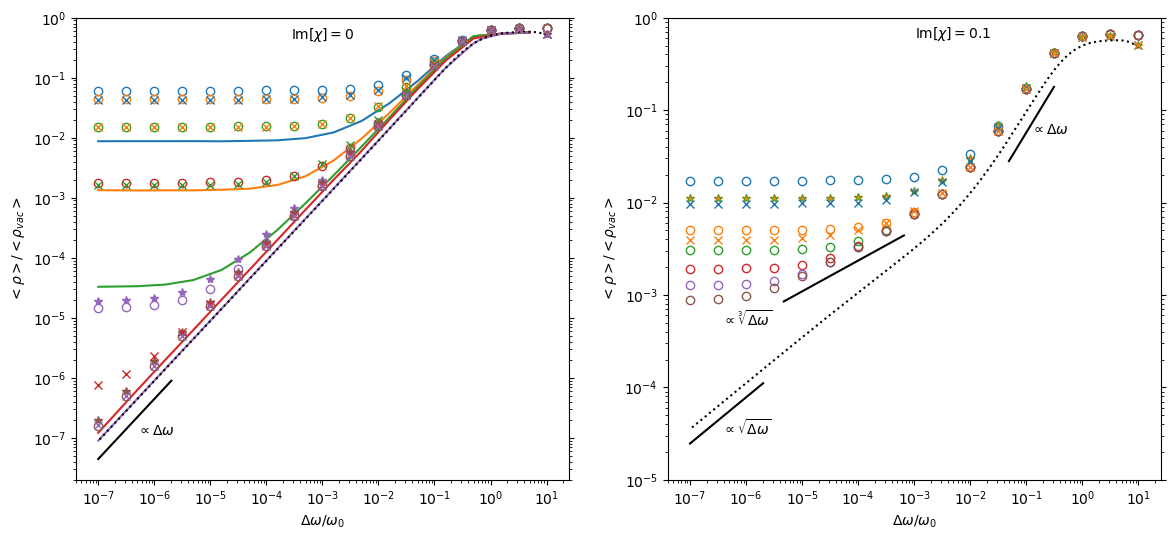

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

L_list = [1.0, 1.26, 1.59, 3.0, 5.0]
styles = ['solid', 'solid', 'solid', 'solid', 'solid']

#plot inf-space bounds
#plot \delta\omega/\omega_{0} (rather than Q) versus the bounds. .
ax1.plot(np.reciprocal(2*chi4_inf_Qsrc_list), chi4_inf_bounds_list, label='$L/\lambda_{0} = \infty$', linestyle='dotted', color='black')

bounds_files = ['DATA_PRL/TMLDOS_fullspace_1by1_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOS_fullspace_1by1_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_Qsrc.txt']
colors = []
#plot curves first 
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, zorder=0)
    colors += [ax1.get_lines()[-1].get_c()]

#next plot inverse designs (so they appear on top of curves)

#Plot inverse designs
#plot circular sym designs to match arbitrary designs for same L values
design_enh_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc.txt']

L_vals = [1, 1.26, 1.59, 3, 5, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    if i < len(colors):
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), color=colors[i], zorder=0)
    else:
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
        colors += [ax1.get_lines()[-1].get_c()]

#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[4], colors[5]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    

#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)

    
#add slopes
end_ind = len(chi4_inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = chi4_inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, chi4_inf_Qsrc_list[end_ind-ind_width//2], 0.5*chi4_inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*chi4_inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(chi4_inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

######################################################################

inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list,  linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black')

#plot 1/2 slope
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot 1 slope
shift = 45
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.6*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.6*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-5), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


#plot 1/3 slope
end_ind = len(inf_Qsrc_list) - 50
start_ind = end_ind - 65
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0/3, Qsrc, inf_Qsrc_list[start_ind], 1.70*inf_bounds_list[start_ind]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt[3]{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind]), 2.0*(inf_bounds_list[end_ind])), # these are the coordinates to position the label
                 xytext=(-25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#Plot inverse designs
#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc.txt']
L_vals = [1, 5, 10, 20, 40, 80]
colors = []
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax2.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$R/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
    colors += [plt.gca().lines[-1].get_color()]
    
#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[1], colors[2]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    if i > 0:
        ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', fillstyle='none', color=periodic_colors[i], zorder=1, markeredgewidth=0.55)
    else:
        ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    
#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)
    
### add im labels
ax1.annotate('Im$[\chi] = 0$', (1e-3, 0.45), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
ax2.annotate('Im$[\chi] = 0.1$', (5*1e-3, 0.6), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
### label
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([2*1e-8, 1])
ax2.set_ylim([1e-5, 1])
# ax1.set_xlim([1e-5/5, 50])
# ax2.set_xlim([1e-7/5, 50])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
# ax1.legend()
# ax2.legend()
plt.savefig('chi4and4+1e-1jfiniteandinfSMALL.pdf', bbox_inches='tight')
plt.savefig('chi4and4+1e-1jfiniteandinfSMALL.png', bbox_inches='tight')

[Text(0, 0.5, '$<\\rho>/<\\rho_{vac}>$')]

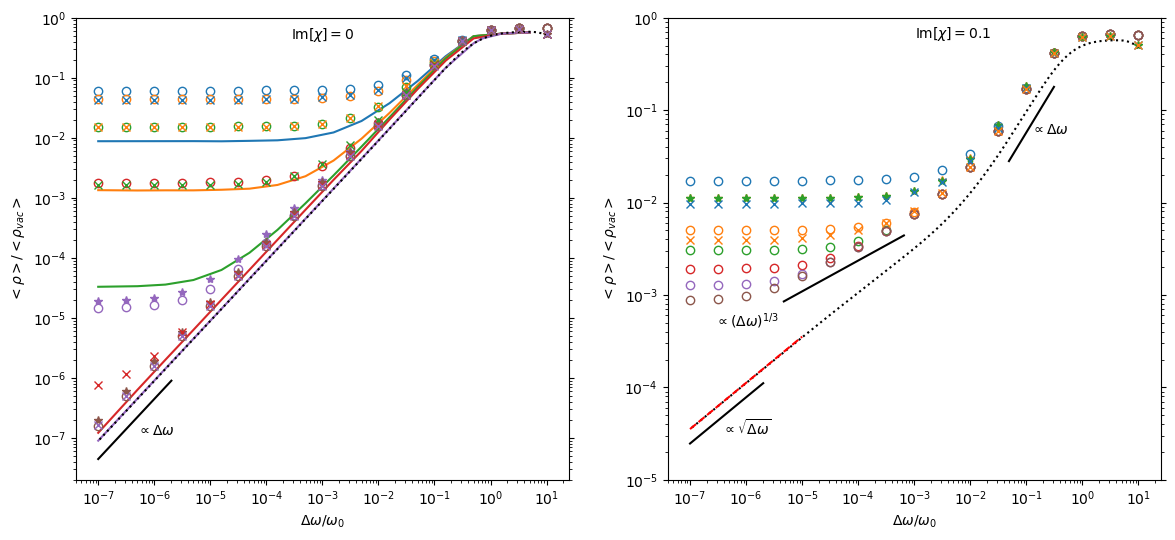

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

L_list = [1.0, 1.26, 1.59, 3.0, 5.0]
styles = ['solid', 'solid', 'solid', 'solid', 'solid']

#plot inf-space bounds
#plot \delta\omega/\omega_{0} (rather than Q) versus the bounds. .
ax1.plot(np.reciprocal(2*chi4_inf_Qsrc_list), chi4_inf_bounds_list, label='$L/\lambda_{0} = \infty$', linestyle='dotted', color='black')

#inv_des_file_names = ['1by1_noomega_allQ_numvacldos_randvac.txt','1d26by1d26_noomega_allQ_numvacldos_randvac.txt', '1d59by1d59_noomega_allQ_numvacldos_randvac.txt',  '3by3_noomega_allQ_numvacldos_randvac.txt','5by5_noomega_allQ_numvacldos_randvac.txt']
#finite_bounds_file_names = ['1by1_noomega_allQ_bounds.txt','Last_Bounds_1d26by1d26_noomega_allQ_numvacldos.txt','Last_Bounds_1d59by1d59_noomega_allQ_numvacldos.txt','Last_Bounds_3by3_noomega_allQ_numvacldos.txt','Latest_Bounds_5by5_noomega_Q1e0to1e6_numvacldos.txt']

bounds_files = ['DATA_PRL/TMLDOS_fullspace_1by1_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOS_fullspace_1by1_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_Qsrc.txt']
colors = []
#plot curves first 
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, zorder=0)
    colors += [ax1.get_lines()[-1].get_c()]

#next plot inverse designs (so they appear on top of curves)

#Plot inverse designs
#plot circular sym designs to match arbitrary designs for same L values
design_enh_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc.txt']

L_vals = [1, 1.26, 1.59, 3, 5, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    if i < len(colors):
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), color=colors[i], zorder=0)
    else:
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
        colors += [ax1.get_lines()[-1].get_c()]

#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[4], colors[5]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    

#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)

    
#add slopes
end_ind = len(chi4_inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = chi4_inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, chi4_inf_Qsrc_list[end_ind-ind_width//2], 0.5*chi4_inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*chi4_inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(chi4_inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

######################################################################

inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list,  linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black')

#plot 1/2 slope
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot 1 slope
shift = 45
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.6*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.6*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-5), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


#plot 1/3 slope
end_ind = len(inf_Qsrc_list) - 50
start_ind = end_ind - 65
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0/3, Qsrc, inf_Qsrc_list[start_ind], 1.70*inf_bounds_list[start_ind]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto (\Delta\omega)^{1/3}$', (1.0/(2*inf_Qsrc_list[end_ind]), 2.0*(inf_bounds_list[end_ind])), # these are the coordinates to position the label
                 xytext=(-25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#Plot inverse designs
#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc.txt']
L_vals = [1, 5, 10, 20, 40, 80]
colors = []
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax2.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$R/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
    colors += [plt.gca().lines[-1].get_color()]
    
#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[1], colors[2]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    
#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)
    
###
dw_list = np.logspace(-7,-5,210)
chi = 4 + 0.1*1j
asym_list = np.sqrt(2)*np.sqrt(np.imag(chi)/abs(chi)**2)*dw_list**(1/2)
ax2.plot(dw_list, asym_list, linestyle='dashed', label='$L/\lambda_{0} = \infty, asymptotics$', color='red')
    
### add im labels
ax1.annotate('Im$[\chi] = 0$', (1e-3, 0.45), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
ax2.annotate('Im$[\chi] = 0.1$', (5*1e-3, 0.6), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
### label
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([2*1e-8, 1])
ax2.set_ylim([1e-5, 1])
# ax1.set_xlim([1e-5/5, 50])
# ax2.set_xlim([1e-7/5, 50])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
# ax1.legend()
# ax2.legend()

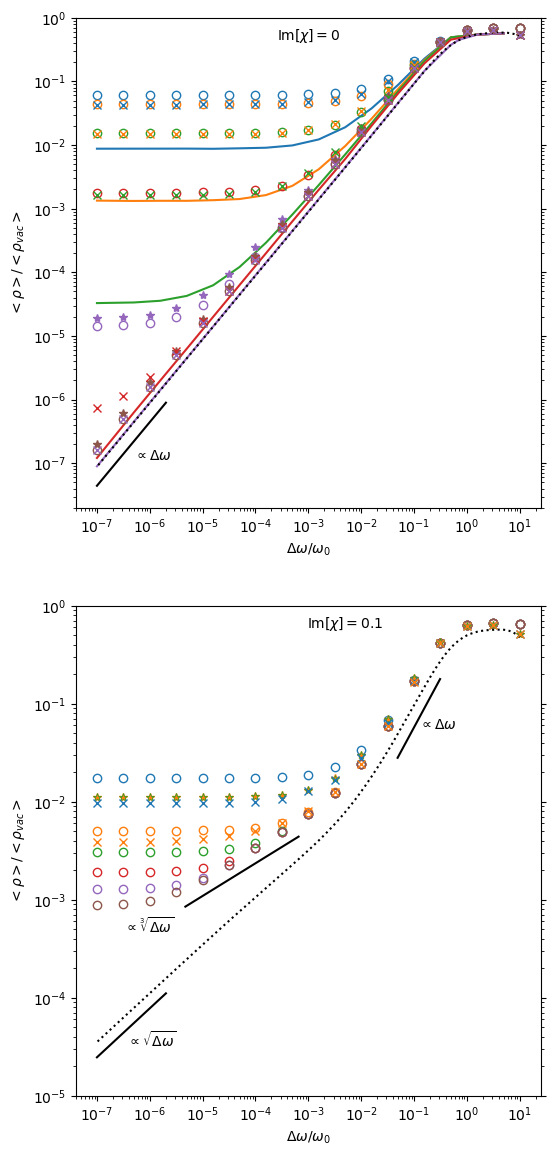

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(6,14))

L_list = [1.0, 1.26, 1.59, 3.0, 5.0]
styles = ['solid', 'solid', 'solid', 'solid', 'solid']

#plot inf-space bounds
#plot \delta\omega/\omega_{0} (rather than Q) versus the bounds. .
ax1.plot(np.reciprocal(2*chi4_inf_Qsrc_list), chi4_inf_bounds_list, label='$L/\lambda_{0} = \infty$', linestyle='dotted', color='black')

#inv_des_file_names = ['1by1_noomega_allQ_numvacldos_randvac.txt','1d26by1d26_noomega_allQ_numvacldos_randvac.txt', '1d59by1d59_noomega_allQ_numvacldos_randvac.txt',  '3by3_noomega_allQ_numvacldos_randvac.txt','5by5_noomega_allQ_numvacldos_randvac.txt']
#finite_bounds_file_names = ['1by1_noomega_allQ_bounds.txt','Last_Bounds_1d26by1d26_noomega_allQ_numvacldos.txt','Last_Bounds_1d59by1d59_noomega_allQ_numvacldos.txt','Last_Bounds_3by3_noomega_allQ_numvacldos.txt','Latest_Bounds_5by5_noomega_Q1e0to1e6_numvacldos.txt']

bounds_files = ['DATA_PRL/TMLDOS_fullspace_1by1_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_bounds.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOS_fullspace_1by1_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p26by1p26_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_1p59by1p59_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_3by3_Qsrc.txt',
               'DATA_PRL/TMLDOS_fullspace_5by5_Qsrc.txt']
colors = []
#plot curves first 
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, zorder=0)
    colors += [ax1.get_lines()[-1].get_c()]

#next plot inverse designs (so they appear on top of curves)

#Plot inverse designs
#plot circular sym designs to match arbitrary designs for same L values
design_enh_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_LDOS_sca_enh.txt',
                    'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+0j_R0p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p63_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R0p795_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R1p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc.txt']

L_vals = [1, 1.26, 1.59, 3, 5, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    if i < len(colors):
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), color=colors[i], zorder=0)
    else:
        ax1.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$L/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
        colors += [ax1.get_lines()[-1].get_c()]

#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[4], colors[5]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    

#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1by1_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p26by1p26_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des1p59by1p59_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des3by3_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)

    
#add slopes
end_ind = len(chi4_inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = chi4_inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, chi4_inf_Qsrc_list[end_ind-ind_width//2], 0.5*chi4_inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*chi4_inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(chi4_inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

######################################################################

inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list,  linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black')

#plot 1/2 slope
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot 1 slope
shift = 45
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.6*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.6*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-5), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


#plot 1/3 slope
end_ind = len(inf_Qsrc_list) - 50
start_ind = end_ind - 65
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0/3, Qsrc, inf_Qsrc_list[start_ind], 1.70*inf_bounds_list[start_ind]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt[3]{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind]), 2.0*(inf_bounds_list[end_ind])), # these are the coordinates to position the label
                 xytext=(-25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#Plot inverse designs
#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R1_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R10_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R20_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc.txt']
L_vals = [1, 5, 10, 20, 40, 80]
colors = []
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax2.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', fillstyle='none', label='$R/\lambda_{0} = $' + str(L_vals[i]), zorder=0)
    colors += [plt.gca().lines[-1].get_color()]
    
#periodic
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

periodic_colors = [colors[1], colors[2]]
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    if i > 0:
        ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', fillstyle='none', color=periodic_colors[i], zorder=1, markeredgewidth=0.55)
    else:
        ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=periodic_colors[i], zorder=1)
    
#general TO code
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des2by2_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_des5by5_fullspace_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'x', color=colors[i], zorder=2)
    
### add im labels
ax1.annotate('Im$[\chi] = 0$', (1e-3, 0.45), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
ax2.annotate('Im$[\chi] = 0.1$', (5*1e-3, 0.6), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center
### label
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([2*1e-8, 1])
ax2.set_ylim([1e-5, 1])
# ax1.set_xlim([1e-5/5, 50])
# ax2.set_xlim([1e-7/5, 50])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
# ax1.legend()
# ax2.legend()
plt.savefig('chi4and4+1e-1jfiniteandinfSMALLvertical.pdf', bbox_inches='tight')
# plt.savefig('chi4and4+1e-1jfiniteandinfSMALLvertical.png', bbox_inches='tight')